# Introduction to deep learning

## Objective

The objective of this session is to use a neural network for a sentiment analysis task on the IMDb dataset. We will learn to classify movie reviews as positive or negative, based on the text content of the reviews.

In [1]:
# Import Basic Modules
import tensorflow as tf # to create neural networks
import numpy as np # to manipulate arrays
import matplotlib.pyplot as plt # for plots
plt.style.use('dark_background') # to adapt the colors to a dark background

C:\Users\Chris\anaconda3a\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#Load and explore the imbd dataset using tensorflow and 
V = 10000
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(path='imdb.npz',
                                                                        num_words = V,
                                                                        maxlen = 1000,
                                                                        start_char = 1,
                                                                        oov_char = 2,
                                                                        index_from = 3)

In [3]:
y_train

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [4]:
np.array(x_train[0])

array([   1,   14,   22,   16,   43,  530,  973, 1622, 1385,   65,  458,
       4468,   66, 3941,    4,  173,   36,  256,    5,   25,  100,   43,
        838,  112,   50,  670,    2,    9,   35,  480,  284,    5,  150,
          4,  172,  112,  167,    2,  336,  385,   39,    4,  172, 4536,
       1111,   17,  546,   38,   13,  447,    4,  192,   50,   16,    6,
        147, 2025,   19,   14,   22,    4, 1920, 4613,  469,    4,   22,
         71,   87,   12,   16,   43,  530,   38,   76,   15,   13, 1247,
          4,   22,   17,  515,   17,   12,   16,  626,   18,    2,    5,
         62,  386,   12,    8,  316,    8,  106,    5,    4, 2223, 5244,
         16,  480,   66, 3785,   33,    4,  130,   12,   16,   38,  619,
          5,   25,  124,   51,   36,  135,   48,   25, 1415,   33,    6,
         22,   12,  215,   28,   77,   52,    5,   14,  407,   16,   82,
          2,    8,    4,  107,  117, 5952,   15,  256,    4,    2,    7,
       3766,    5,  723,   36,   71,   43,  530,  4

In [5]:
word2idx = tf.keras.datasets.imdb.get_word_index()
word2idx['movie']

17

In [6]:
#Create a dictionary named idx2word to invert the word2idx dictionary
idx2word = {value:key for key, value in word2idx.items()}

my_first_sequence = []
for idx in x_train[0]:
    try:
        my_first_sequence.append(idx2word[idx-3])
    except:
        my_first_sequence.append('oov')


In [7]:
np.array(my_first_sequence)


array(['oov', 'this', 'film', 'was', 'just', 'brilliant', 'casting',
       'location', 'scenery', 'story', 'direction', "everyone's",
       'really', 'suited', 'the', 'part', 'they', 'played', 'and', 'you',
       'could', 'just', 'imagine', 'being', 'there', 'robert', 'oov',
       'is', 'an', 'amazing', 'actor', 'and', 'now', 'the', 'same',
       'being', 'director', 'oov', 'father', 'came', 'from', 'the',
       'same', 'scottish', 'island', 'as', 'myself', 'so', 'i', 'loved',
       'the', 'fact', 'there', 'was', 'a', 'real', 'connection', 'with',
       'this', 'film', 'the', 'witty', 'remarks', 'throughout', 'the',
       'film', 'were', 'great', 'it', 'was', 'just', 'brilliant', 'so',
       'much', 'that', 'i', 'bought', 'the', 'film', 'as', 'soon', 'as',
       'it', 'was', 'released', 'for', 'oov', 'and', 'would', 'recommend',
       'it', 'to', 'everyone', 'to', 'watch', 'and', 'the', 'fly',
       'fishing', 'was', 'amazing', 'really', 'cried', 'at', 'the', 'end',
      

In [8]:
#Creating the tensor of data
#Define a function named vectorize wich will return V dimensional vector where all elements are 0, except for the indices present in the data
def vectorize(sequences, V):
    N = len(sequences)

    input_tensor = np.zeros((N, V))
    for index, sequence in enumerate(sequences):
        input_tensor[index, sequence] = 1

    return input_tensor

##Vectorize

In [9]:
#Vectorize
X_train = vectorize(x_train, V)
X_test = vectorize(x_test, V)

In [10]:
y_train = np.float32(y_train)
y_test = np.float32(y_test)

In [11]:
#Using Sequential from tensorflow.keras as explained in this link, Create the following model:
from tensorflow.keras.models import Sequential # to define a stack of layers
from tensorflow.keras.layers import Dense, Input # The dense layer and the input


model = Sequential()

model.add(Input(shape = (V,)))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │     2,560,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,597,553 (9.91 MB)

 Trainable params: 2,597,553 (9.91 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
#Compile the defined model with Stochastic Gradient Descent as the optimizer include accuracy in the metrics and choose the appropriate loss function
N_epochs = 20 # Number of epochs
M = 64 # batch size

model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['acc'])

history = model.fit(X_train, y_train, epochs = N_epochs, batch_size = M, validation_split = 0.3)

Epoch 1/20
273/273 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - acc: 0.5878 - loss: 0.6768 - val_acc: 0.6341 - val_loss: 0.6068
Epoch 2/20
273/273 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - acc: 0.8040 - loss: 0.4982 - val_acc: 0.5547 - val_loss: 1.0636
Epoch 3/20
273/273 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - acc: 0.8528 - loss: 0.3552 - val_acc: 0.8600 - val_loss: 0.3316
Epoch 4/20
273/273 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - acc: 0.8942 - loss: 0.2726 - val_acc: 0.8770 - val_loss: 0.3000
Epoch 5/20
273/273 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - acc: 0.9001 - loss: 0.2534 - val_acc: 0.8743 - val_loss: 0.3104
Epoch 6/20
273/273 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - acc: 0.9221 - loss: 0.2151 - val_acc: 0.8702 - val_loss: 0.3227
Epoch 7/20
273/273 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - acc: 0.9279 - loss: 0.1893 - val_acc: 0.6148 - val_loss: 1.2117
Epoch 8/20
273/273 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - acc: 0.9277 - loss: 0.1921 - val_acc: 0.6923 - val_loss: 1.0097
Epoch 9/20
273/273 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/

In [13]:
#Display the losses and accuracies for the training and the validation data

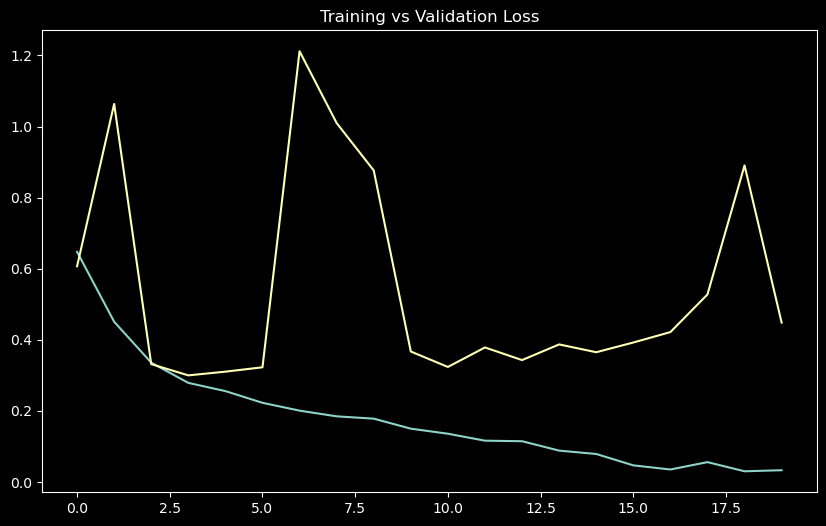

In [14]:
plt.figure(figsize = (10, 6))
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Testing Loss')
plt.title('Training vs Validation Loss')
plt.show()

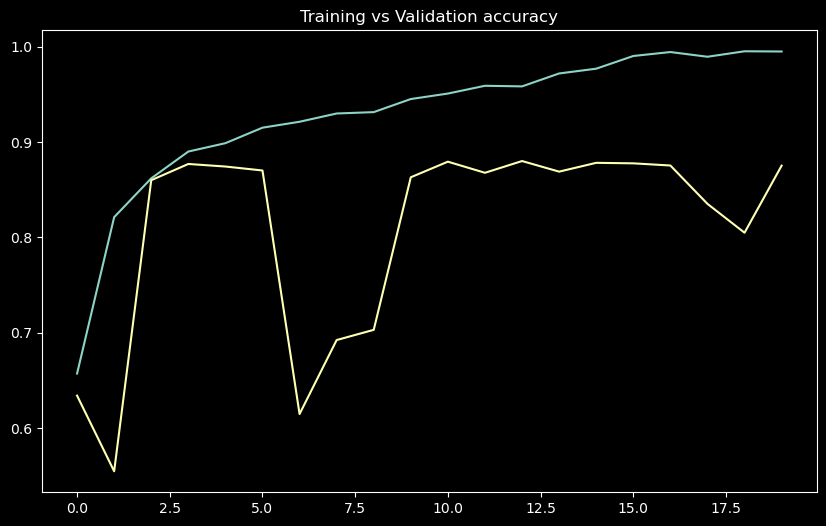

In [15]:
plt.figure(figsize = (10, 6))
plt.plot(history.history['acc'], label = 'Training accuracy')
plt.plot(history.history['val_acc'], label = 'Testing accuracy')
plt.title('Training vs Validation accuracy')
plt.show()

In [16]:
#Fight the overfitting problem

## Figthing the overfitting problem 

In [18]:
from tensorflow.keras.models import Sequential # to define a stack of layers
from tensorflow.keras.layers import Dense, Dropout # The dense and dropout layers

In [19]:
#Dropout Neurons with a rate of 0.2)
model = Sequential()

model.add(Input(shape = (V,)))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))

In [20]:
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 256)            │     2,560,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,597,553 (9.91 MB)

 Trainable params: 2,597,553 (9.91 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['acc'])


In [22]:
history = model.fit(X_train, y_train, epochs = 10, batch_size = M, validation_split = 0.3)


Epoch 1/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - acc: 0.5202 - loss: 0.6910 - val_acc: 0.6243 - val_loss: 0.6685
Epoch 2/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - acc: 0.6257 - loss: 0.6609 - val_acc: 0.7945 - val_loss: 0.5677
Epoch 3/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - acc: 0.7383 - loss: 0.5674 - val_acc: 0.8133 - val_loss: 0.4477
Epoch 4/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - acc: 0.7987 - loss: 0.4723 - val_acc: 0.8001 - val_loss: 0.4397
Epoch 5/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - acc: 0.8354 - loss: 0.4114 - val_acc: 0.8514 - val_loss: 0.3582
Epoch 6/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - acc: 0.8595 - loss: 0.3617 - val_acc: 0.8376 - val_loss: 0.3851
Epoch 7/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - acc: 0.8748 - loss: 0.3330 - val_acc: 0.7198 - val_loss: 0.6025
Epoch 8/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - acc: 0.8915 - loss: 0.3041 - val_acc: 0.8249 - val_loss: 0.3995
Epoch 9/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/

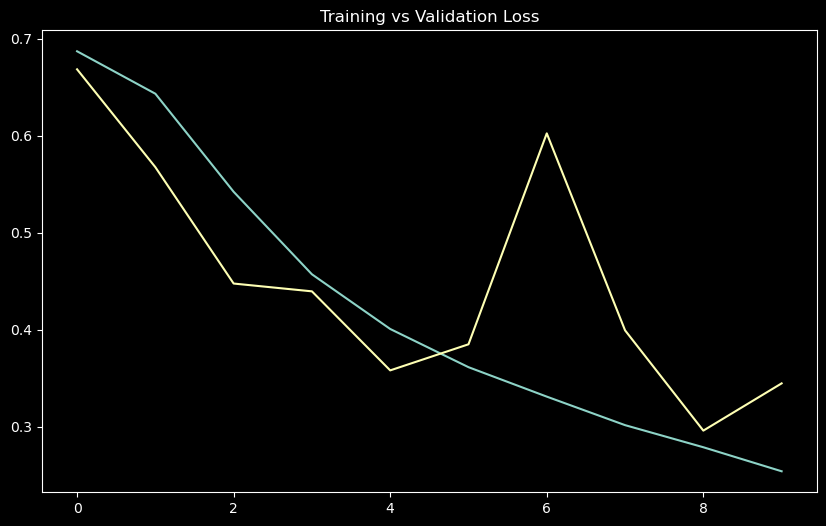

In [24]:
#Display the losses and accuracies for the training and the validation data.

plt.figure(figsize = (10, 6))
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Testing Loss')
plt.title('Training vs Validation Loss')
plt.show()


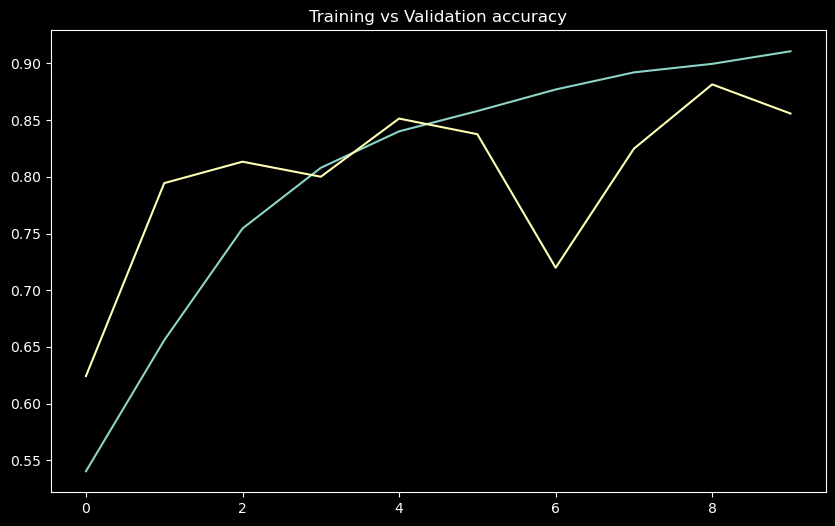

In [25]:
plt.figure(figsize = (10, 6))
plt.plot(history.history['acc'], label = 'Training accuracy')
plt.plot(history.history['val_acc'], label = 'Testing accuracy')
plt.title('Training vs Validation accuracy')
plt.show()

In [26]:
#Evaluate the final model
model.evaluate(X_test, y_test)


780/780 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.8444 - loss: 0.3663


[0.37051209807395935, 0.8445718288421631]